##### Problem Statement:
##### Check how to student's performance depends on many factors from the data set

import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Load the 

Read the data

In [7]:
data = pd.read_csv("data/stud.csv")

1. Data has 1000 data records and 8 features
2. Out of 8 features there are 3 numerical features - math_Score, reading_score, writing_score are numerical and 5 are categorical features - gender,race_ethnicity, parental_level_of_education, lunch, test_preparation_course


In [6]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
data[data.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


1. There are no Nan values in the dataset
2. There are no Duplicated values in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
for column in data.columns:
    if data[column].dtypes == "O":
        print(data[column].value_counts(), end="\n\n")

gender
female    518
male      482
Name: count, dtype: int64

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course
none         642
completed    358
Name: count, dtype: int64



In [13]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. Mean and standard Deviation are very close to each other
2. math_score has a min value of 0 but min values of reading_score and writing_scor are 17 and 10 respectively

## Exploring data

In [17]:
for column in data.columns:
    if data[column].dtypes == "O":
        print(f"\"{column}\" column has only {data[column].nunique()} values - {data[column].unique()}", end="\n\n")

"gender" column has only 2 values - ['female' 'male']

"race_ethnicity" column has only 5 values - ['group B' 'group C' 'group A' 'group D' 'group E']

"parental_level_of_education" column has only 6 values - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

"lunch" column has only 2 values - ['standard' 'free/reduced']

"test_preparation_course" column has only 2 values - ['none' 'completed']



In [19]:
# Get numerical and categorical features
numerical_features = [column for column in data.columns if data[column].dtypes != "O"]
categorical_features = [column for column in data.columns if data[column].dtypes == "O"]

print(f"There are {len(numerical_features)} columns - {numerical_features}")
print(f"There are {len(categorical_features)} columns - {categorical_features}")


There are 3 columns - ['math_score', 'reading_score', 'writing_score']
There are 5 columns - ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


1. For having a single column for prediction we add the reading_score, writing_score, math_score and form a new column as total_score 
2. From total_score we can calculate average score and add it as new column


In [20]:
data_copy = data.copy(deep=True)

In [23]:
data_copy["total_score"] = data_copy["math_score"] + data_copy["reading_score"] + data_copy["writing_score"]
data_copy["average"] = data_copy["total_score"] / 3
data_copy.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [28]:
data_copy[data_copy["math_score"] == 100]["average"].count()

7

In [30]:
## Check if there are any students who have scored full marks

print(f"Number of Students scoring Full Marks in Math : {data_copy[data_copy['math_score'] == 100]['average'].count()}")
print(f"Number of Students scoring Full Marks in Reading : {data_copy[data_copy['reading_score'] == 100]['average'].count()}")
print(f"Number of Students scoring Full Marks in Writing : {data_copy[data_copy['writing_score'] == 100]['average'].count()}")

Number of Students scoring Full Marks in Math : 7
Number of Students scoring Full Marks in Reading : 17
Number of Students scoring Full Marks in Writing : 14


In [32]:
print(f"Number of Students scoring less than 20 in Marks in Math : {data_copy[data_copy['math_score'] <= 20]['average'].count()}")
print(f"Number of Students scoring less than 20 in Reading : {data_copy[data_copy['reading_score'] <= 20]['average'].count()}")
print(f"Number of Students scoring less than 20 in Writing : {data_copy[data_copy['writing_score'] <= 20]['average'].count()}")

Number of Students scoring less than 20 in Marks in Math : 4
Number of Students scoring less than 20 in Reading : 1
Number of Students scoring less than 20 in Writing : 3


<Axes: xlabel='average', ylabel='Count'>

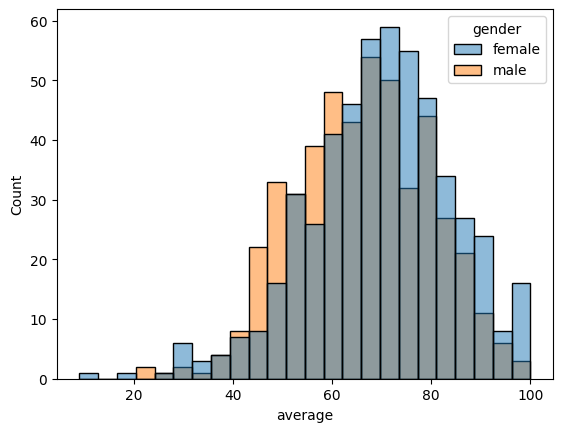

In [36]:
sns.histplot(data=data_copy, x="average", hue="gender")

Girls have scored better than boys as the feamle average is morethan the male average

In [44]:
data_copy.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

<Axes: title={'center': 'Male Students lunch'}, xlabel='average', ylabel='Count'>

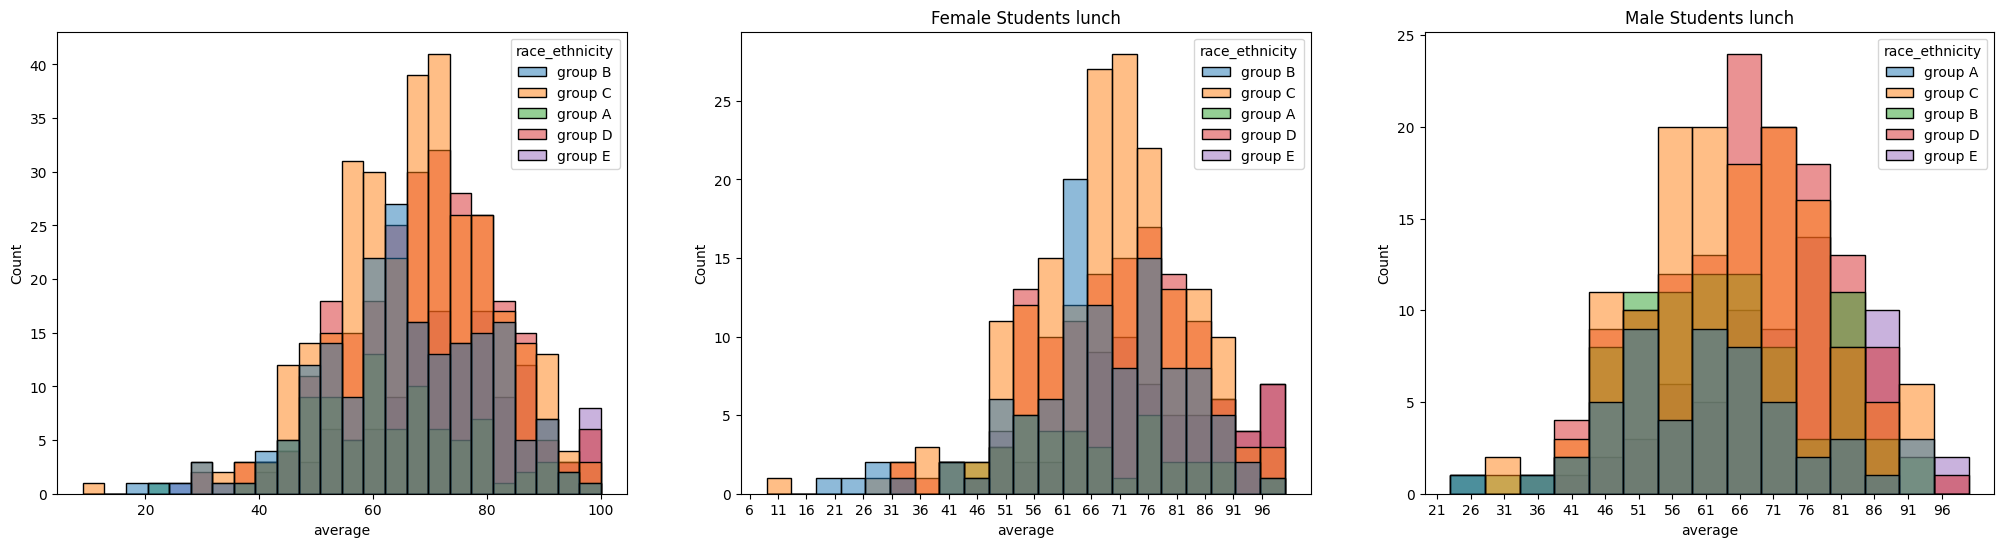

In [48]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)

sns.histplot(data=data_copy, x="average", hue="race_ethnicity")
plt.subplot(132)
plt.title("Female Students lunch")
plt.xticks(range(1, 100, 5))
sns.histplot(data=data_copy[data_copy['gender'] == "female"], x="average", hue="race_ethnicity")
plt.subplot(133)
plt.title("Male Students lunch")
plt.xticks(range(1, 100, 5))
sns.histplot(data=data_copy[data_copy['gender'] == "male"], x="average", hue="race_ethnicity")

1. Students from Grop C enticity have performed better
2. In Male students Group C enticity have performed better
2. In Female students Group D enticity have performed better

<Axes: title={'center': 'Male Students lunch'}, xlabel='average', ylabel='Count'>

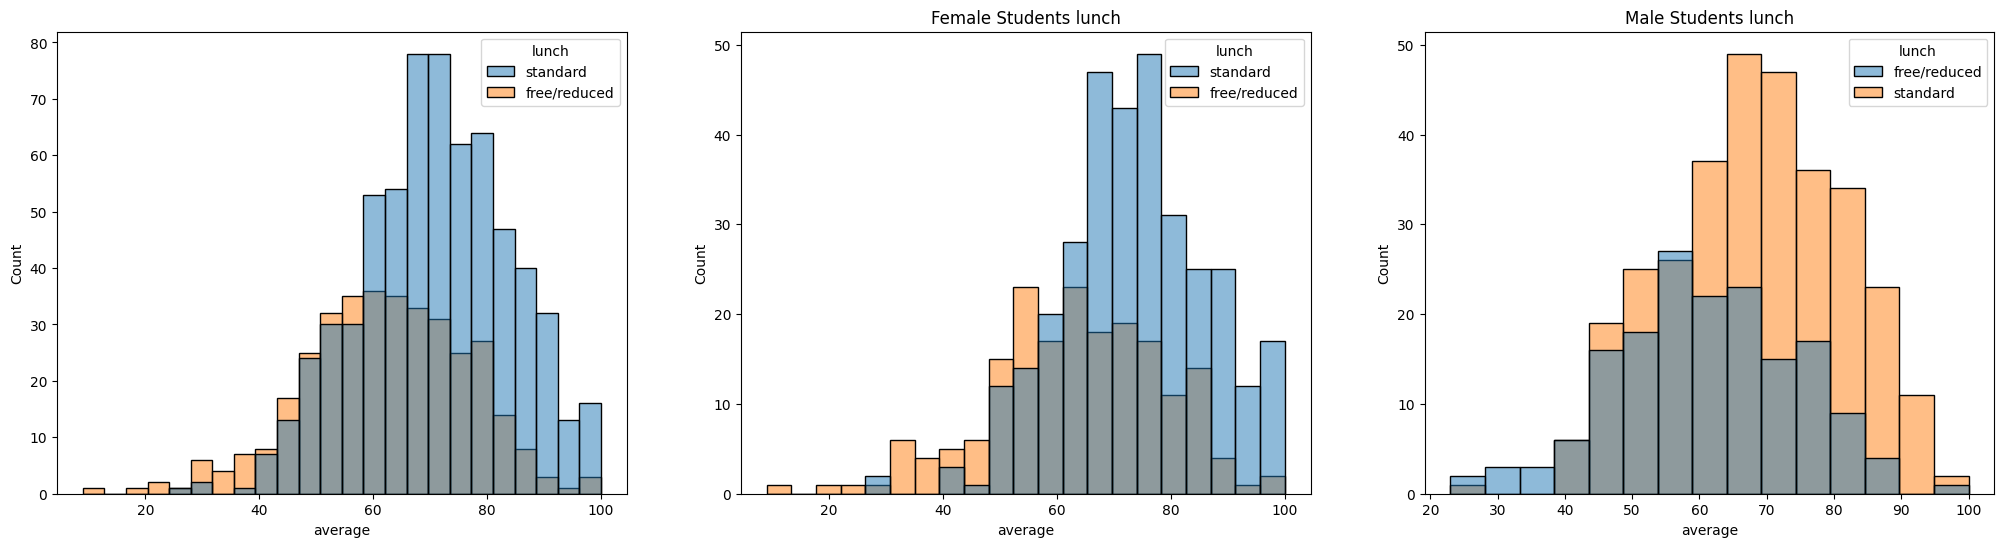

In [47]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)

sns.histplot(data=data_copy, x="average", hue="lunch")
plt.subplot(132)
plt.title("Female Students lunch")
sns.histplot(data=data_copy[data_copy['gender'] == "female"], x="average", hue="lunch")
plt.subplot(133)
plt.title("Male Students lunch")
sns.histplot(data=data_copy[data_copy['gender'] == "male"], x="average", hue="lunch")

Irrespective of the gender the students who had standard lunch performed better

<Axes: title={'center': 'Male Students lunch'}, xlabel='average', ylabel='Count'>

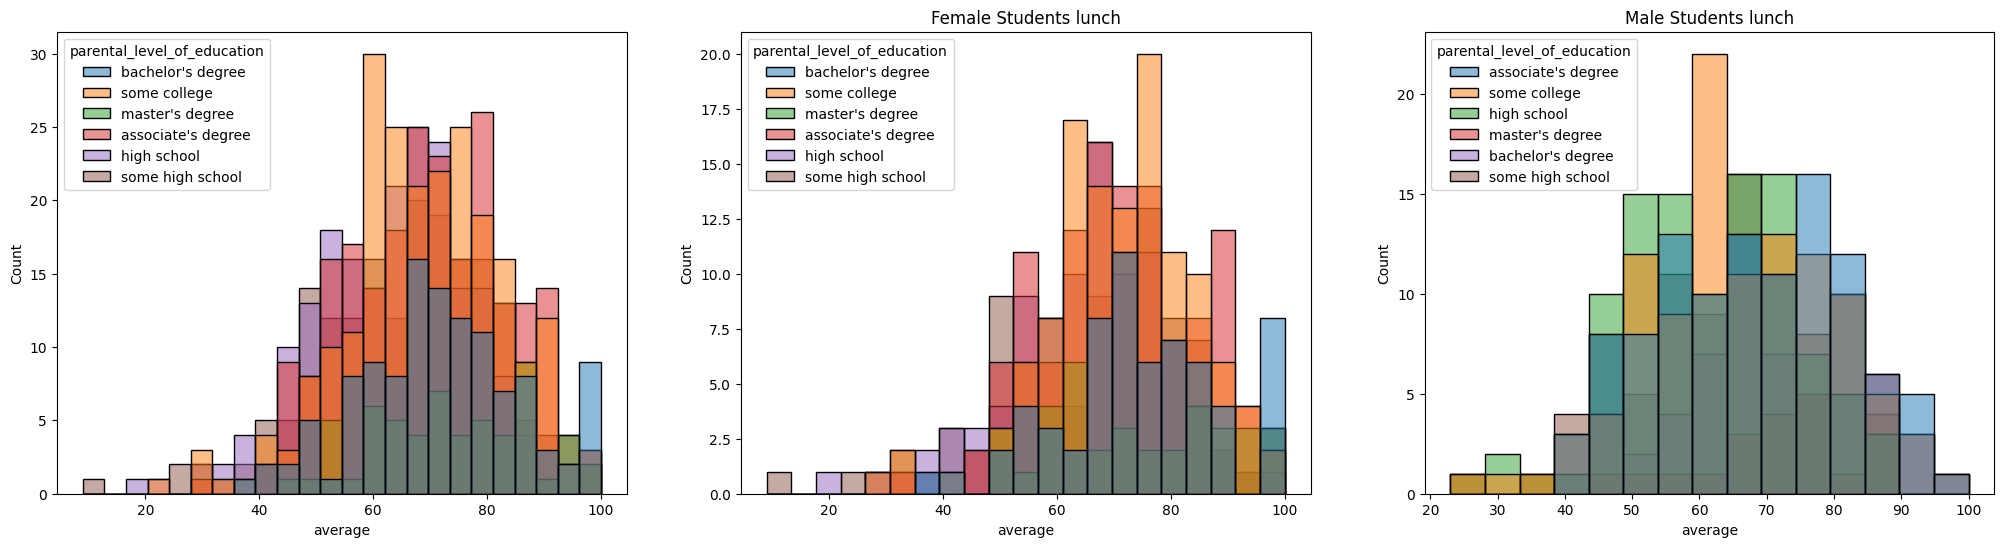

In [49]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)

sns.histplot(data=data_copy, x="average", hue="parental_level_of_education")
plt.subplot(132)
plt.title("Female Students lunch")
sns.histplot(data=data_copy[data_copy['gender'] == "female"], x="average", hue="parental_level_of_education")
plt.subplot(133)
plt.title("Male Students lunch")
sns.histplot(data=data_copy[data_copy['gender'] == "male"], x="average", hue="parental_level_of_education")